In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)

# Review the DataFrame
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


<Axes: xlabel='loan_status'>

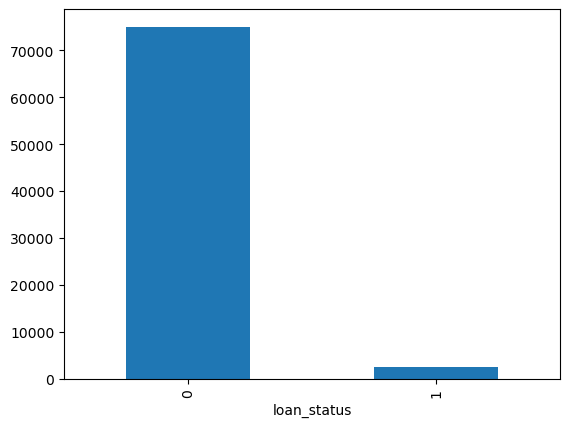

In [15]:
#bar chart to see the difference in the amount of data we have for
#each set

df_lending["loan_status"].value_counts().plot(kind="bar")


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending['loan_status']


# Separate the X variable, the features
X = df_lending.drop(columns='loan_status')


In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)


# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
#training_predictions = logistic_regression_model.predict(X_train)
testing_predictions = logistic_regression_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, testing_predictions)


In [19]:
true_labels = ["True Positives", "True Negatives"]
pred_labels = ["Pred Positives", "Pred Negative"]

In [20]:
# Print the classification report for the model
pd.DataFrame(training_matrix, index=true_labels, columns=pred_labels)

,Pred Positives,Pred Negative
True Positives,18663,102
True Negatives,56,563


$$ Precision = T_p/ (T_p + F_p) $$
$$ Recall = T_p / (T_p + F_n)$$
$$ F_1 = (2 * (P*R)) / P+R $$

In [18]:
len(df_lending[df_lending["loan_status"]==1]) /len(df_lending) * 100

3.224308708212959

In [12]:
print(classification_report(y_test, testing_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.



**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model demonstrated excellent performance in predicting healthy loans, achieving near-perfect accuracy. It also performed admirably in identifying high-risk loans, despite the fact that high-risk loans constituted only about 3% of the dataset. This indicates the model's robustness and effectiveness in handling imbalanced data while maintaining high prediction accuracy for both loan statuses.


---